**Alumnos y padron:**

Izquierdo Osorio, Stephanie. 104196 

Rosas, Martin Alejandro. 98535

---



## Introduccion

En este informe se presenta un análisis realizado con los datos que nos proporciona FIUFIP sobre contribuyentes. La idea es poder determinar qué factores son los más importantes para definir si un usuario tiene altos o bajos ingresos.

El informe se divide en varias secciones: 
  - Preparación de entorno
  - Limpieza de los datos
  - Análisis Exploratorio
  - Conclusiones
  - Baseline

Estando el análisis exploratorio subdividido en secciones relacionadas con cada feature del dataset y las relaciones entre ellos.




### Objetivos:

*   Limpieza y preparacion de datos
*   Entendimiento de los datos
*   Lograr determinar relaciones y patrones entre estos
*   Indicar qué factores son predominantes al determinar si un usuario tiene o no altos ingresos



## Preparación del entorno

### Importación de bibliotecas

Nos pareció indicado utilizar tanto matplotlib como seaborn para hacer los graficos. Pandas para el manejo de dataframes a partir de los datos originales en csv.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests

### Carga del Dataset


In [152]:
with requests.get(
    "https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv"
) as r, open("impuestos.cvs", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)


Hacemos un primer vistazo de la estructura de los datos

In [153]:
data = pd.read_csv("impuestos.cvs")
data.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


## Limpieza

Analizamos primero los tipos de datos que tiene el dataframe con el objetivo de poder luego convertirlo a otros formatos que puedan llegar a ser más útiles para manipular.


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   anios_estudiados                            32561 non-null  int64 
 1   barrio                                      31978 non-null  object
 2   categoria_de_trabajo                        30725 non-null  object
 3   edad                                        32561 non-null  int64 
 4   educacion_alcanzada                         32561 non-null  object
 5   estado_marital                              32561 non-null  object
 6   ganancia_perdida_declarada_bolsa_argentina  32561 non-null  int64 
 7   genero                                      32561 non-null  object
 8   horas_trabajo_registradas                   32561 non-null  int64 
 9   religion                                    32561 non-null  object
 10  rol_familiar_registrad

In [155]:
data.isnull().sum()

anios_estudiados                                 0
barrio                                         583
categoria_de_trabajo                          1836
edad                                             0
educacion_alcanzada                              0
estado_marital                                   0
ganancia_perdida_declarada_bolsa_argentina       0
genero                                           0
horas_trabajo_registradas                        0
religion                                         0
rol_familiar_registrado                          0
tiene_alto_valor_adquisitivo                     0
trabajo                                       1843
dtype: int64


Vemos que hay una baja cantidad de valores nulos, y solo sucede en 3 
columas.

Veamos si hay datos cargados con errores (falta de ortografia, distintas palabras queriendo decir lo mismo, etc)

In [156]:
data['barrio'].unique()

array(['Palermo', 'Balvanera', 'Caballito', 'Almagro', nan, 'Belgrano',
       'Boedo', 'La Boca', 'Versalles', 'Puerto Madero', 'Recoleta',
       'Villa Urquiza', 'Nueva Pompeya', 'San Isidro', 'Chacarita',
       'Flores', 'Liniers', 'Villa Devoto', 'San Telmo', 'Parque Chas',
       'Villa Real', 'Monte Castro', 'Mataderos', 'Monserrat', 'Coghland',
       'Agronomia', 'Villa Luro', 'Constitucion', 'Barracas',
       'Colegiales', 'Santa Rita', 'Parque Chacabuco',
       'Villa General Mitre', 'Villa Pueyrredon', 'Villa Soldati',
       'Parque Avellaneda', 'nuñez', 'Floresta', 'Retiro', 'La Paternal',
       'Velez Sarsfield', 'Cilla Riachuelo'], dtype=object)

In [157]:
data['categoria_de_trabajo'].unique()

array(['empleado_provincial', 'monotibutista', 'relacion_de_dependencia',
       'empleadao_estatal', 'empleado_municipal', nan,
       'responsable_inscripto', 'trabajo_voluntariado', 'sin_trabajo'],
      dtype=object)

In [158]:
data['educacion_alcanzada'].unique()

array(['universidad_3_anio', '4_anio', '2_anio', 'universidad_4_anio',
       '9_grado', '5_anio', 'universidad_2_anio', 'universidad_1_anio',
       '7-8_grado', 'universiada_6_anio', 'universiada_5_anio',
       '5-6_grado', '1_anio', '1-4_grado', 'preescolar', '3_anio'],
      dtype=object)

In [159]:
data['estado_marital'].unique()

array(['sin_matrimonio', 'matrimonio_civil', 'divorciado',
       'pareja_no_presente', 'separado', 'matrimonio_militar', 'viudo_a'],
      dtype=object)

In [160]:
data['genero'].unique()

array(['hombre', 'mujer'], dtype=object)

In [161]:
data['religion'].unique()

array(['cristianismo', 'judaismo', 'budismo', 'ateismo', 'otro'],
      dtype=object)

In [162]:
data['rol_familiar_registrado'].unique()

array(['sin_familia', 'casado', 'casada', 'con_hijos', 'soltero_a',
       'otro'], dtype=object)

In [163]:
data['trabajo'].unique()

array(['entretenimiento', 'directivo_gerente', 'limpiador',
       'profesional_especializado', 'otros', 'ventas', 'reparador',
       'transporte', 'sector_primario', 'inspector', 'soporte_tecnico',
       nan, 'seguridad', 'ejercito', 'servicio_domestico'], dtype=object)



Vemos que no hay mucha cantidad de valores posibles para los features porque podemos ver que todos son categoricos excepto la edad y los años estudiados.

Los datos fueron cargados consistentemente y hay campos que no fueron completados, como por ejemplo en la columna 'trabajo' y 'barrio'. Se completa a priori por "No responde" para poder distinguirlos

In [164]:
data['trabajo'].fillna('No responde', inplace = True)
data['barrio'].fillna('No responde', inplace = True)
data['categoria_de_trabajo'].fillna('No responde', inplace = True)

Comenzamos cambiando la variable categorica Genero en numerica lo cual va a ser util para sacar estadisticas y promedios

In [165]:
data = pd.get_dummies(data, columns=['genero'], drop_first = True)

#### Procederemos a ver si hay features del dataset que repitan informacion entre si

A primera vista identificamos una cierta coincidencia entre lo que representa "anios_estudiados" y "educacion_alcanzada". Vamos a ver si existe una relación entre ellas.

Para esto comenzamos viendo que valores de años estudiados se encuentran en cada valor de educación alcanzada

In [166]:
group = data.groupby("educacion_alcanzada")['anios_estudiados']
group.aggregate(set) #funciona como el unique

educacion_alcanzada
1-4_grado              {4}
1_anio                {10}
2_anio                {11}
3_anio                {12}
4_anio                {13}
5-6_grado              {6}
5_anio                {14}
7-8_grado              {8}
9_grado                {9}
preescolar             {1}
universiada_5_anio    {19}
universiada_6_anio    {20}
universidad_1_anio    {15}
universidad_2_anio    {16}
universidad_3_anio    {17}
universidad_4_anio    {18}
Name: anios_estudiados, dtype: object

Podemos ver que a cada valor de educación alcanzada le corresponde solo un valor de años estudiados, por ende hay una relacion 1 a 1 entre estos dos features y por eso podemos decir que la información entre estas dos columnas son la misma.

Se decide entonces eliminar la columna con variables categóricas.
(Posteriormente se considerara agrupar estos valores en un rango entre jardín, primaria, secundaria y universidad)

In [167]:
data.drop(columns='educacion_alcanzada',inplace=True)

Continuamos viendo si existe una relacion entre estado marital y rol familiar

In [168]:
data['rol_familiar_registrado'].unique()

array(['sin_familia', 'casado', 'casada', 'con_hijos', 'soltero_a',
       'otro'], dtype=object)

In [169]:
data['estado_marital'].unique()

array(['sin_matrimonio', 'matrimonio_civil', 'divorciado',
       'pareja_no_presente', 'separado', 'matrimonio_militar', 'viudo_a'],
      dtype=object)

In [170]:
group = data.groupby("rol_familiar_registrado")['estado_marital']
group.aggregate(set)

rol_familiar_registrado
casada                    {matrimonio_civil, matrimonio_militar}
casado                    {matrimonio_civil, matrimonio_militar}
con_hijos      {separado, matrimonio_civil, pareja_no_present...
otro           {separado, matrimonio_civil, pareja_no_present...
sin_familia    {separado, matrimonio_civil, pareja_no_present...
soltero_a      {separado, pareja_no_presente, sin_matrimonio,...
Name: estado_marital, dtype: object

Vemos que hay una relacion entre casada/o con matrimonio_civil y matrimonio militar, pero luego observamos que 'con_hijos', 'otros', 'sin_familia', 'soltero_a' se dan varias combinaciones con la variable 'rol_familiar_registrado'.


In [171]:
group = data.groupby("trabajo")['categoria_de_trabajo']
group.aggregate(set)

trabajo
No responde                                         {sin_trabajo, No responde}
directivo_gerente            {monotibutista, relacion_de_dependencia, emple...
ejercito                                                   {empleadao_estatal}
entretenimiento              {monotibutista, relacion_de_dependencia, emple...
inspector                    {monotibutista, relacion_de_dependencia, emple...
limpiador                    {monotibutista, relacion_de_dependencia, emple...
otros                        {monotibutista, relacion_de_dependencia, emple...
profesional_especializado    {monotibutista, relacion_de_dependencia, emple...
reparador                    {monotibutista, relacion_de_dependencia, emple...
sector_primario              {monotibutista, relacion_de_dependencia, emple...
seguridad                    {monotibutista, relacion_de_dependencia, emple...
servicio_domestico                                   {relacion_de_dependencia}
soporte_tecnico              {monotibutista,

Observamos que ocurre algo similar que con los features anteriores. Por lo cual a priori no decidimos agrupar ni unificar variables ya que hay distintas combinaciones

## Análisis exploratorio
Comenzamos el analisis planteandonos unas preguntas basicas
- Sabiendo que tener hijos implica un gran gasto, ¿esto se relaciona con tener bajo poder adquisitivo?
- Puede haber alguna relacion entre los valores posibles de rol familiar y estado marital? Es lo mismo casado que matrimonio?
- ¿Es más común tener alto valor adquisitivo en los casos de alguna religión en particular?
- ¿La zona geografica donde reside posee alguna relacion con tener altos ingresos? ¿Coincide esto con los barrios tradicionalmente conocidos por el precio alto de sus inmuebles?
- ¿Se puede ver una diferencia de los ingresos segun el genero? ¿es visible la grieta salarial?
- ¿Invertir en la bolsa esta relacionado con tener altos ingresos? ¿o es algo que tambien hace la gente con bajos ingresos?
- ¿Como es la relación con la edad? ¿Es mas común en jovenes tener bajo poder adquisitivo?
- ¿Es posible obtener mas información combinando distintos features?




Comenzamos generando una funcion que grafica recibiendo un dataframe, y un feature del mismo, para cada valor posible del feature, que porcentaje de los casos tiene alto valor de poder adquisitivo

In [172]:
def draw_purchasing_power_by_feature(data, feature, title, label):
  #Al ser 1 y 0 los valores posibles del feature alto_valor_adquisitivo, la funcion mean nos devuelve un promedio de los valores que multiplicandolo 
  #por 100 nos da el porcentaje de casos con alto valor adquisitivo para ese valor de feature
  data_dict = (data.groupby(feature)["tiene_alto_valor_adquisitivo"].mean()*100)\
              .sort_values(ascending=False).to_dict()
  labels = list(data_dict.keys())
  porcentajes_alto_valor = list(data_dict.values())
  porcentajes_bajo_valor = [100.0 - i for i in porcentajes_alto_valor]
  width = 0.20
  r1 = np.arange(len(labels))
  r2 = [x + width for x in r1]
  fig, ax = plt.subplots()
  rects1 = ax.bar(r1, porcentajes_alto_valor, width, label='Alto valor adquisitivo', color= '#f07b3f')
  rects2 = ax.bar(r2, porcentajes_bajo_valor, width, label='Sin alto valor adquisitivo',  color= '#3ec1d3')
  ax.set_ylabel('Porcentajes')
  ax.set_xlabel(label)
  ax.set_xticks(range(len(labels)))
  ax.set_xticklabels(labels)
  ax.legend()
  fig.tight_layout()
  plt.ylim((0,110))
  plt.title(title)
  plt.legend(loc="upper right")
  plt.rcParams["figure.figsize"] = [12,7]

  plt.show()

### Dataset en general

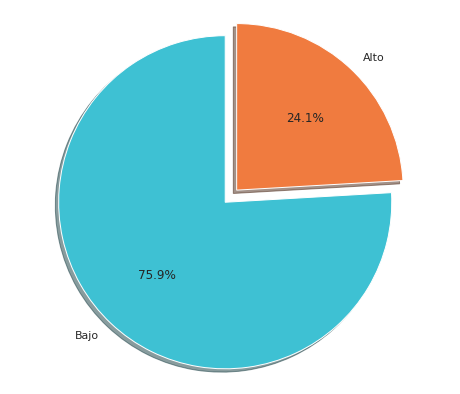

In [173]:
labels = "Bajo", "Alto"
sizes = (data["tiene_alto_valor_adquisitivo"].value_counts(normalize=True)*100).to_list()
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#3ec1d3', '#f07b3f'])
ax1.axis('equal') 
plt.show()


Podemos ver que tomando todo el dataset, solo el 24.08% de los casos tienen alto poder adquisitivo y un 75.91% no. Vamos a ver si para ciertos valores de los features esto no coincide y hay alguna tendencia.

### Rol Familiar

Considerando que tener hijos implica un gasto importante suponemos que es mas alto el porcentaje de casos con alto valor adquisitivo para personas sin hijos. Vamos a investigar si esto se cumple.

Vemos que para cada uno de los valores posibles tenemos una cantidad suficiente de casos como para que tengan valor

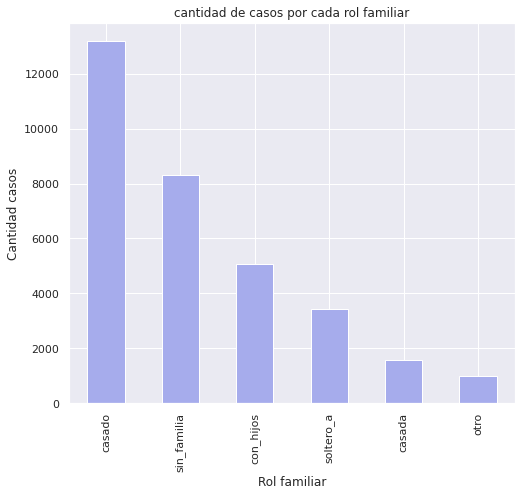

In [174]:
ax = data['rol_familiar_registrado'].value_counts().plot(kind="bar", title="cantidad de casos por cada rol familiar", color= '#a6acec')
ax.set_xlabel("Rol familiar");
ax.set_ylabel("Cantidad casos");

Vamos a analizar agrupando por rol familiar qué porcentaje de casos tienen alto valor adquisitivo. 

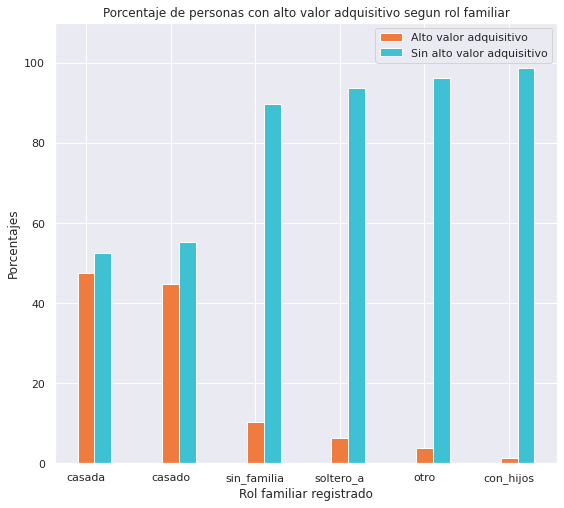

In [175]:
draw_purchasing_power_by_feature(data,'rol_familiar_registrado', "Porcentaje de personas con alto valor adquisitivo segun rol familiar", "Rol familiar registrado")

De este grafico podemos inducir que tener hijos influye en tener bajo valor adquisitivo porque está bastante mas abajo de la media.

Además sabiendo que tenemos un dataset donde solo el 25% de los casos tiene alto poder adquisitivo, aca podemos ver que si nos quedamos solo con los casados y casadas esto pasa a ser mas del 40% por lo cual esto parece mostrar una tendencia al alto valor adquisitivo.

Suponiendo que todos los casos que no indicaron "con hijos" en rol familiar registrado, es porque no los tienen. Miremos, quedandonos solo con casos de alto valor adquisitivo , que porcentaje tiene hijos y que porcentaje no.


In [176]:
data["tiene_hijos"] = data["rol_familiar_registrado"].apply(lambda x: x == "con_hijos")


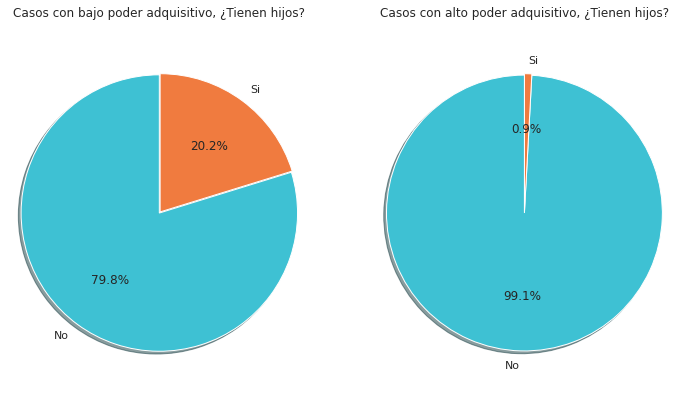

In [177]:
sizes_bajo_poder =  (data[data["tiene_alto_valor_adquisitivo"] == False]["tiene_hijos"].value_counts(normalize=True)*100).sort_index().to_list()
sizes_alto_poder =  (data[data["tiene_alto_valor_adquisitivo"] == True]["tiene_hijos"].value_counts(normalize=True)*100).sort_index().to_list()
labels = "No", "Si"
explode = (0, 0.01) 
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].pie(sizes_bajo_poder, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#3ec1d3', '#f07b3f'])
axes[0].axis('equal') 
axes[1].pie(sizes_alto_poder, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#3ec1d3', '#f07b3f'])
axes[1].axis('equal') 
axes[0].set_title("Casos con bajo poder adquisitivo, ¿Tienen hijos?")
axes[1].set_title("Casos con alto poder adquisitivo, ¿Tienen hijos?")
plt.show()

Podemos ver una gran diferencia. En los casos de bajo poder adquisitivo, un 20% tienen hijos, y en los casos con alto poder adquisitivo, menos del 1%. Esta tendencia coincide con nuestra hipotesis.

### Estado marital

Anteriormente pudimos ver puede haber una equivalencia entre  matrimonio_civil/matrimonio_militar y casada / casado en rol familiar. Vamos a graficar la cantidad de casos y porcentaje de alto valor adquisitivo para ver si coinciden. 

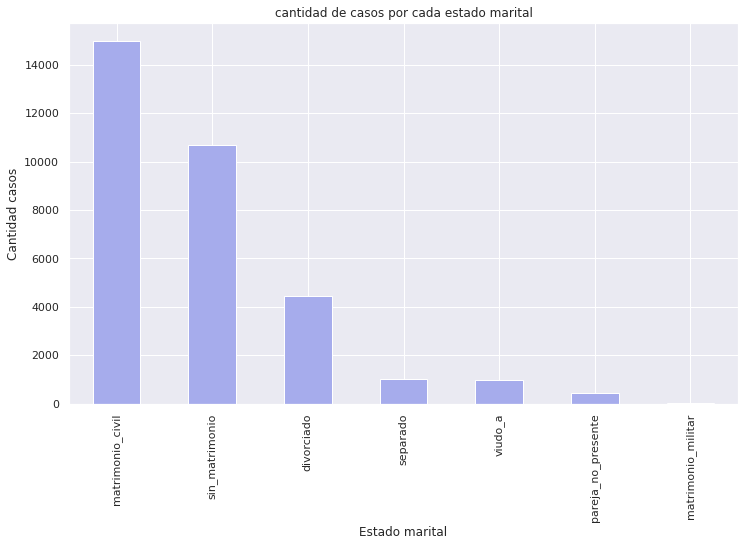

In [178]:
ax = data['estado_marital'].value_counts().plot(kind="bar", title="cantidad de casos por cada estado marital", color= '#a6acec')
ax.set_xlabel("Estado marital");
ax.set_ylabel("Cantidad casos");

Hay 4 valores para los que hay muy pocos casos como para tener en cuenta la información que aportan, pero podemos ver qué nos dice el resto.

Miremos el porcentaje de alto valor adquisitivo

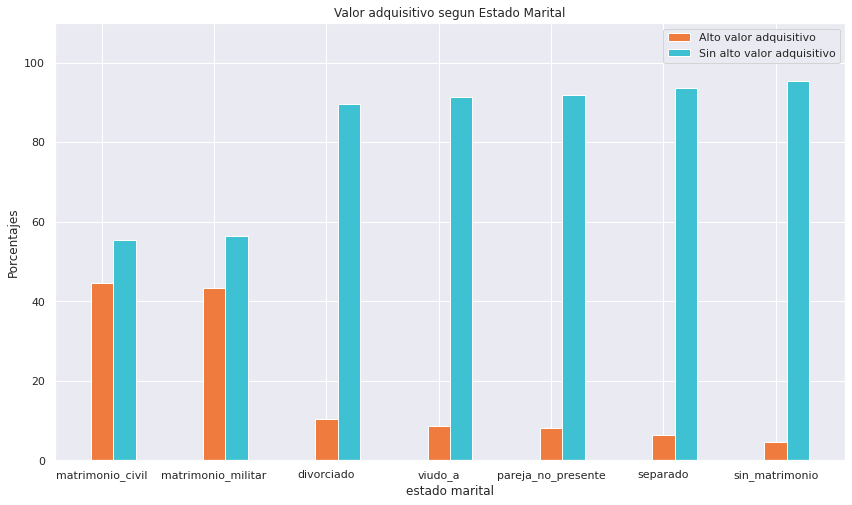

In [179]:
draw_purchasing_power_by_feature(data, 'estado_marital', "Valor adquisitivo segun Estado Marital", "estado marital")

De este grafico podemos decir que aquellos que no concibieron matrimonio son quienes tienen mayor probabilidad de no tener alto valor adquisitivo

Finalmente pudimos ver que los graficos de estado marital y rol familiar no representan lo mismo. Son distintos en cantidad de casos por valor posible, y ademas en porcentaje con alto valor adquisitivo no hay coincidencia entre los valores casado y matrimonio (tanto civil como militar) como supusimos.


### Religion

¿Es más común tener alto valor adquisitivo en los casos de alguna religión en particular?

Primero vamos a fijarnos que cantidad de casos hay para cada valor posible para ver si el feature aporta información.


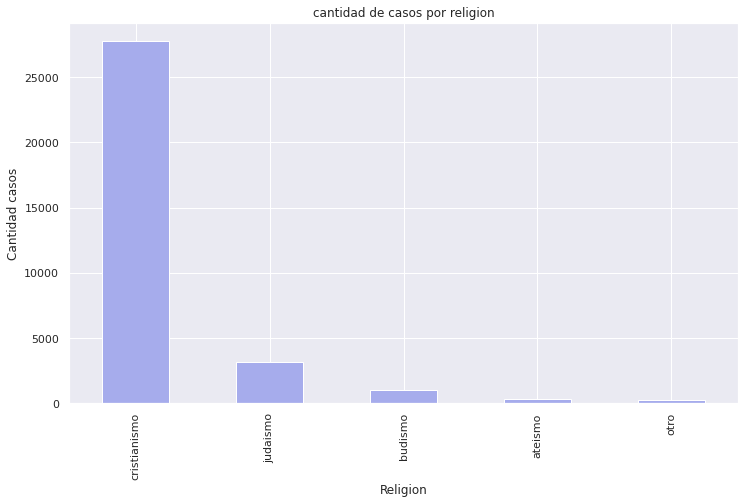

In [180]:
ax = data['religion'].value_counts().plot(kind="bar", title="cantidad de casos por religion", color= '#a6acec')
ax.set_xlabel("Religion");
ax.set_ylabel("Cantidad casos");

 Al graficar la cantidad de casos que hay por cada religión vemos que la mayoria son de cristianismo, y algunos de judaismo. Del resto hay tan pocos que decidimos ignorarlos. Veamos para estas dos el porcentaje de alto y bajo valor adquisitivo.

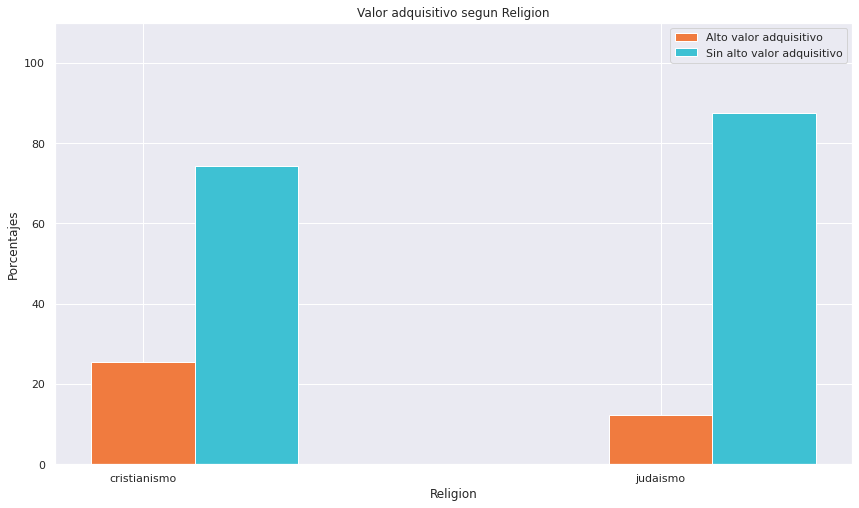

In [181]:
cristianismo_judaismo = data[(data["religion"] == "judaismo") | (data["religion"] == "cristianismo")]
draw_purchasing_power_by_feature(cristianismo_judaismo, 'religion', "Valor adquisitivo segun Religion", "Religion")

Podemos ver el porcentaje en los casos de cristianismo es igual al promedio de casos en general con alto valor adquisitivo. En cambio, los casos de judaismo tienen un porcentaje mas bajo que ese promedio. Podemos concluir con que el judaismo es la única religión con una tendencia (hacia menos poder adquisitivo), ya que el cristianismo se encuentra en el promedio y el resto de las religiones tienen muy pocos casos como para tenerlas en cuenta.

### Barrios

Se tiene la hipótesis de que aquellos barrios que son mas caros de vivir y por eso se necesita tener mayores ingresos son: Palermo, Recoleta, Belgrano, San isidro, Villa Urquiza y Puerto madero.

Veamos si podemos ver esto reflejado en los datos.

Primero veamos cuantas muestras tenemos de cada barrio.

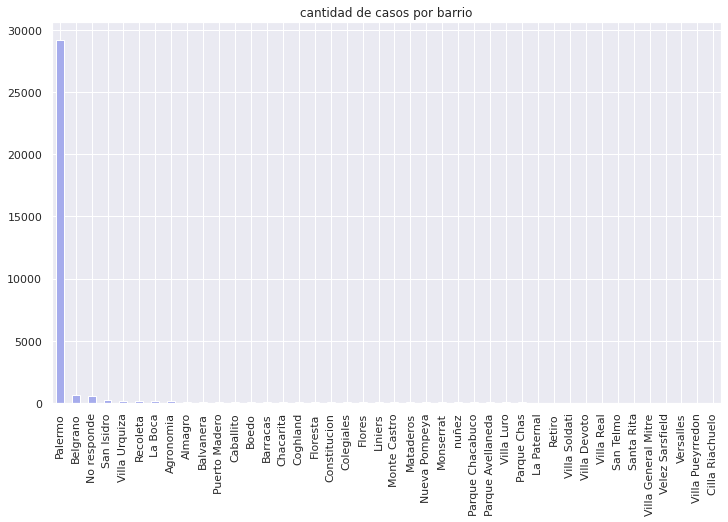

In [182]:
total_barrios = data['barrio'].value_counts().plot(kind="bar", title="cantidad de casos por barrio", color= '#a6acec');

Como casi todos los casos son en Palermo no podemos tomar en cuenta la información del resto de los barrios así como está.  Decimos probar agrupandolos por zona, para ver si con eso juntamos mas cantidad.

In [183]:
zones = {
    "south": ['Boedo', 'La Boca', 'Nueva Pompeya', 'San Telmo', 'Constitucion', 'Barracas',  'Villa Soldati',
             'La Paternal', 'Cilla Riachuelo'],
    "north": ['Palermo', 'Belgrano', 'Recoleta', 'San Isidro',  'Coghland', 'Colegiales',  'nuñez', 'Retiro'],
    "east": ['Puerto Madero'],
    "west": ['Versalles', 'Villa Urquiza', 'Liniers', 'Villa Devoto', 'Parque Chas', 'Villa Real',  'Monte Castro',
            'Mataderos', 'Agronomia', 'Villa Luro',  'Santa Rita', 'Villa General Mitre', 'Parque Avellaneda',
            'Floresta', 'Velez Sarsfield'],
    "city_centre": ['Monserrat', 'Balvanera'],
    "rest": ["Almagro", 'Chacarita',  'Caballito', 'Flores', 'Parque Chacabuco', 'Villa Pueyrredon', ]
  }
def get_zone(neighbourhood):
    for zone_name, neighbourhoods in zones.items():
        if neighbourhood in neighbourhoods:
            return zone_name

In [184]:
data["zone"] = data["barrio"].apply(get_zone)

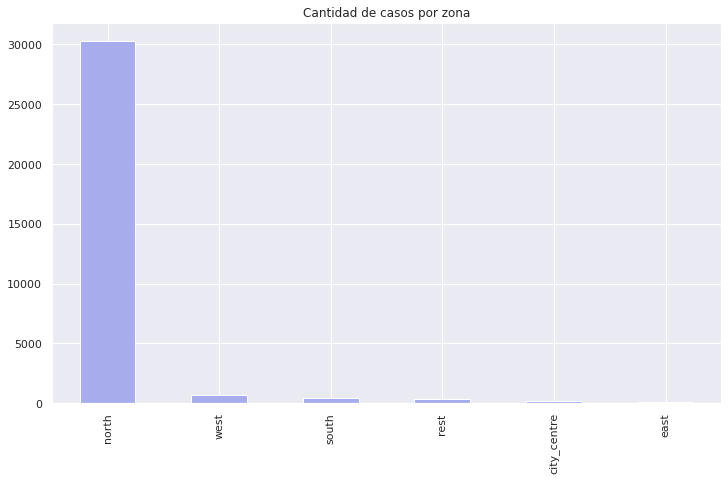

In [185]:
data["zone"].value_counts().plot(kind="bar", title="Cantidad de casos por zona", color= '#a6acec');

Sigue habiendo un desbalance enorme en cantidad de casos asi que no podemos afirmar nada respecto a la hipotesis.

### Género

Es sabido que existe una brecha salarial entre los hombres y las mujeres, que se debe a multiples factores, y queremos ver si esto tambien se puede ver en los datos que tenemos


In [186]:
data["genero"] = data["genero_mujer"].apply(lambda x: "Hombre" if x == 0 else "Mujer")

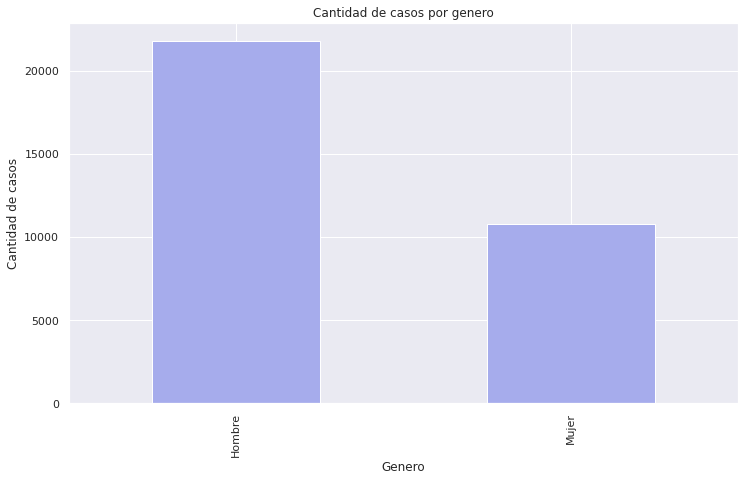

In [187]:
ax = data["genero"].value_counts().plot(kind="bar", title="Cantidad de casos por genero", color= '#a6acec');
ax.set_xlabel("Genero")
ax.set_ylabel("Cantidad de casos");


La cantidad de mujeres encuestadas fue de alrededor de 10000, la mitad que la cantidad de hombres.

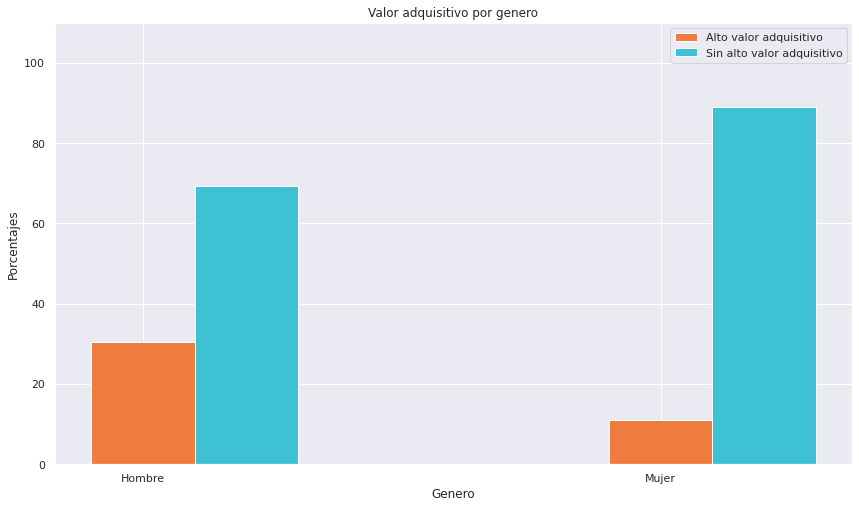

In [188]:
draw_purchasing_power_by_feature(data, "genero", "Valor adquisitivo por genero", "Genero")

Y comparando el porcentaje de valor adquisitivo, los hombres casi triplican al porcentaje de mujeres, con un 31% contra 11%

Veamos cuál es la proporción si nos quedamos sólo con los casos que tienen alto poder adquisitivo

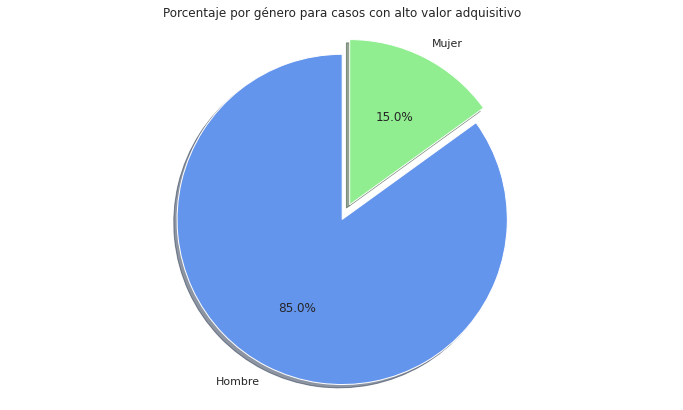

In [189]:
labels = "Hombre", "Mujer"
sizes = (data[data["tiene_alto_valor_adquisitivo"] == 1]["genero"].value_counts(normalize=True)*100).sort_index().to_list()
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = ['cornflowerblue','lightgreen'])
ax1.axis('equal') 
plt.title("Porcentaje por género para casos con alto valor adquisitivo")
plt.show()

Las mujeres representan solo un 15% y los hombres 85%

### Inversión en la bolsa

A priori uno cree que aquellos que invierten en la bolsa son aquellos que poseen alto valor adquisitivo dado que es dinero 'extra' que utilizan para eso por ende deberia haber mas chances de tener alto valor adquisitivo.

Primero veamos cuantos son

In [190]:
data["actividad_bolsa"] = data["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: "tiene actividad" if x != 0 else "no tiene actividad")

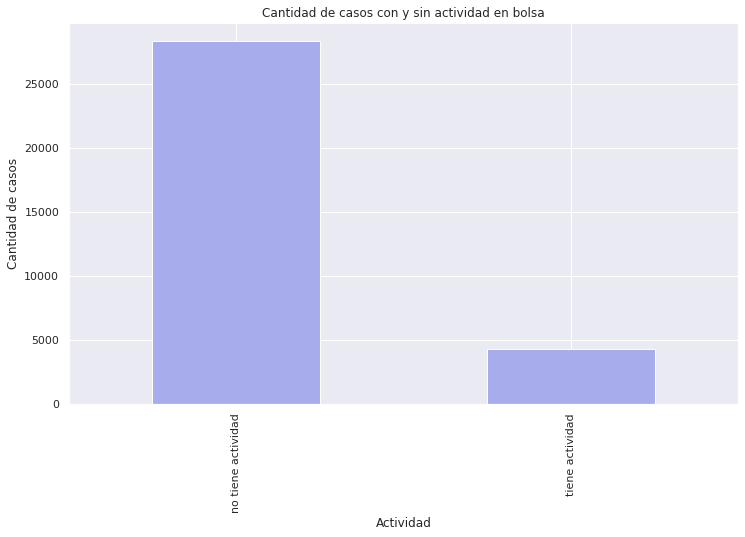

In [191]:
ax = data["actividad_bolsa"].value_counts().plot(kind="bar",\
                                            title="Cantidad de casos con y sin actividad en bolsa", color= '#a6acec');
ax.set_xlabel("Actividad")
ax.set_ylabel("Cantidad de casos");

Los casos con actividad en bolsa son minoria pero no es una cantidad despreciable

¿Qué porcentaje de los casos con actividad en bolsa tiene alto valor adquisitivo?

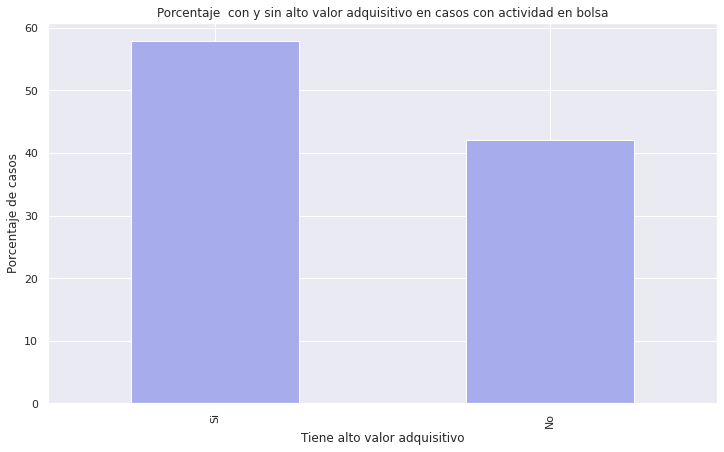

In [192]:
ax = (data[data['ganancia_perdida_declarada_bolsa_argentina']!=0]["tiene_alto_valor_adquisitivo"]\
    .value_counts(normalize=True)*100).rename({1: "Si", 0: "No"}).plot(kind="bar", title="Porcentaje  con y sin alto valor adquisitivo en casos con actividad en bolsa", color= '#a6acec')
ax.set_xlabel("Tiene alto valor adquisitivo")
ax.set_ylabel("Porcentaje de casos");

Los datos nos dicen que el 57,9% de las personas que inviertieron en la bolsa poseen alto valor adquisitivo. Sabiendo que estamos usando un dataset con solo 25% de casos de alto valor adquisitivo, aca parece haber una tendencia clara

Ahora vamos a dividir el dataframe en 3 partes distintas: las personas con ganancias en bolsa, con perdidas y sin actividad. Es posible que alguno de estos 3 casos separados tenga alguna tendencia respecto al poder adquisitivo?

In [193]:
ganancias_bolsa = data[data['ganancia_perdida_declarada_bolsa_argentina'] > 0].copy()
perdidas_bolsa = data[data['ganancia_perdida_declarada_bolsa_argentina'] < 0].copy()
sin_actividad_bolsa = data[data['ganancia_perdida_declarada_bolsa_argentina'] == 0].copy()
porcentajes_ganancia = (ganancias_bolsa["tiene_alto_valor_adquisitivo"].value_counts(normalize=True)*100).sort_index().to_list()
porcentajes_perdida = (perdidas_bolsa["tiene_alto_valor_adquisitivo"].value_counts(normalize=True)*100).sort_index().to_list()
porcentajes_sin_actividad = (sin_actividad_bolsa["tiene_alto_valor_adquisitivo"].value_counts(normalize=True)*100).sort_index().to_list()

Ahora graficamos el porcentaje de casos con y sin alto valor adquisitivo para cada uno de los 3 casos y comparamos

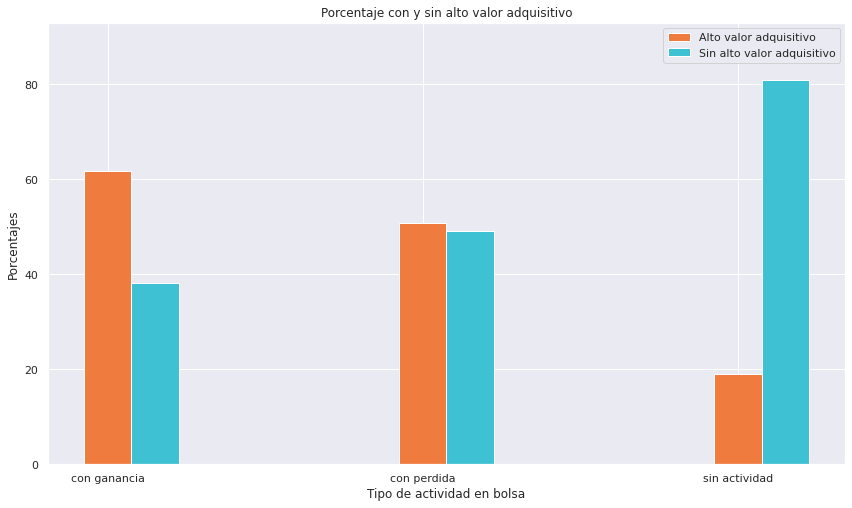

In [194]:
labels = ['con ganancia', 'con perdida', 'sin actividad']
porcentajes_bajo_valor = [porcentajes_ganancia[0], porcentajes_perdida[0], porcentajes_sin_actividad[0]]
porcentajes_alto_valor = [porcentajes_ganancia[1], porcentajes_perdida[1], porcentajes_sin_actividad[1]]
width = 0.15
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
fig, ax = plt.subplots()
rects1 = ax.bar(r1, porcentajes_alto_valor, width, label='Alto valor adquisitivo', color= '#f07b3f')
rects2 = ax.bar(r2, porcentajes_bajo_valor, width, label='Sin alto valor adquisitivo',  color='#3ec1d3')
ax.set_ylabel('Porcentajes')
ax.set_xlabel('Tipo de actividad en bolsa')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.ylim((0,93))
plt.title("Porcentaje con y sin alto valor adquisitivo")
plt.legend(loc="upper right")
plt.show()

Como pudimos ver, en las personas que tienen ganancias en bolsa es más comun tener alto valor adquisitivo y la gente sin actividad en su enorme mayoria tiene bajo poder adquisivo


Ahora, que pasa si dividimos el dataframe en cuartiles? Los valores de los cuartiles nos van a servir para dividir en partes iguales al dataframe entre rangos de ganancias ordenados. Así, ordenando por cuartiles las personas que tuvieron ganancias, el primer cuartil de datos va a tener el 25% de casos que menos ganancias tuvieron y el ultimo cuartil el 25% que más.

Es posible que algun cuartil tenga alguna tendencia en particular?

Primero obtengamos los valores por los cuales vamos a dividir en cuartiles los dataframes de perdidas y ganancias

In [195]:
percentiles = np.arange(1, 4) * 4
p25_ganancia = [np.percentile(ganancias_bolsa["ganancia_perdida_declarada_bolsa_argentina"], quart) for quart in percentiles]
percentiles = np.arange(1, 4) * 4
p25_perdida = [np.percentile(perdidas_bolsa["ganancia_perdida_declarada_bolsa_argentina"], quart) for quart in percentiles]


perdidas_bolsa["cuartil_franja"] = pd.qcut(perdidas_bolsa["ganancia_perdida_declarada_bolsa_argentina"], 4)
ganancias_bolsa["cuartil_franja"] = pd.qcut(ganancias_bolsa["ganancia_perdida_declarada_bolsa_argentina"], 4)
loss_ranges = perdidas_bolsa["cuartil_franja"].value_counts().sort_index()
quantiles_loss = {loss_ranges.index[i]: i+1 for i in range(len(loss_ranges))}
perdidas_bolsa["cuartil"] = perdidas_bolsa["cuartil_franja"].apply(lambda x: quantiles_loss[x])
profit_ranges = ganancias_bolsa["cuartil_franja"].value_counts().sort_index()
quantiles_profit = {profit_ranges.index[i]: i+1 for i in range(len(profit_ranges))}
ganancias_bolsa["cuartil"] = ganancias_bolsa["cuartil_franja"].apply(lambda x: quantiles_profit[x])


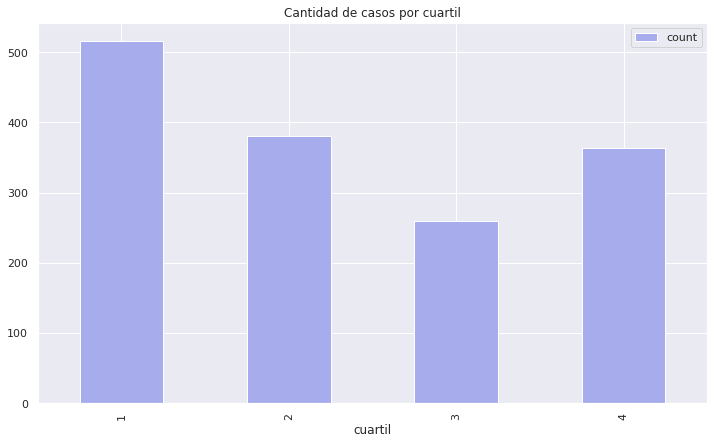

In [196]:
perdidas_bolsa.groupby("cuartil")["tiene_alto_valor_adquisitivo"].agg(["count"]).plot(kind="bar", title="Cantidad de casos por cuartil", color= '#a6acec');

Como hay muchos valores repetidos para las perdidas, la cantidad de casos por cuartil no es exactamente el 25% (porque es imposible separar ordenado por franjas de tamaño igual si son 4) pero se mantiene cerca.

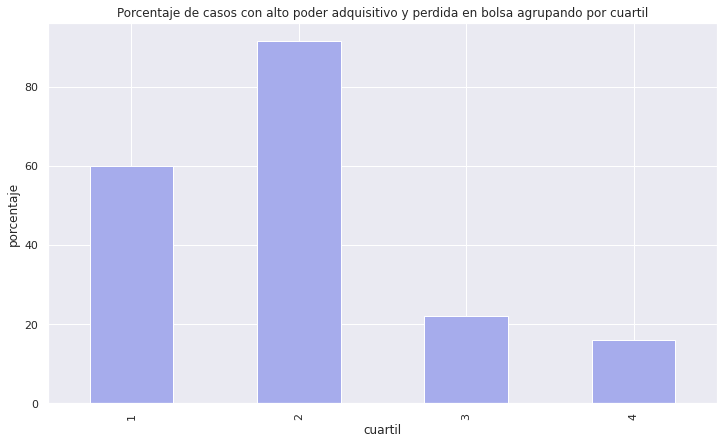

In [197]:
ax = (perdidas_bolsa.groupby("cuartil")["tiene_alto_valor_adquisitivo"].mean()*100).plot(kind="bar", title="Porcentaje de casos con alto poder adquisitivo y perdida en bolsa agrupando por cuartil", color= '#a6acec')
ax.set_ylabel("porcentaje");


Podemos ver que hay cuartiles que claramente tienen tendencia al poder adquisitivo tanto alto como bajo. Ninguno se mantiene en el promedio.

Descubrimos tambien algo curioso, podemos ver que la gran mayoria de aquellos que se encuentran en el primer y segundo cuartil tienen alto poder adquisitivo (llegando a casi el 90% en el segundo, muy alejado del promedio), mientras que el tercer cuartil se mantiene en el promedio y el cuarto esta un poco mas abajo. Por lo cual no vemos un "orden" segun cuartil, sino que cada cuartil se comporta diferente.

Ahora veamos los casos de ganancias en bolsa.
Hagamos un chequeo por las dudas de que no tengan pocos casos los cuartiles.

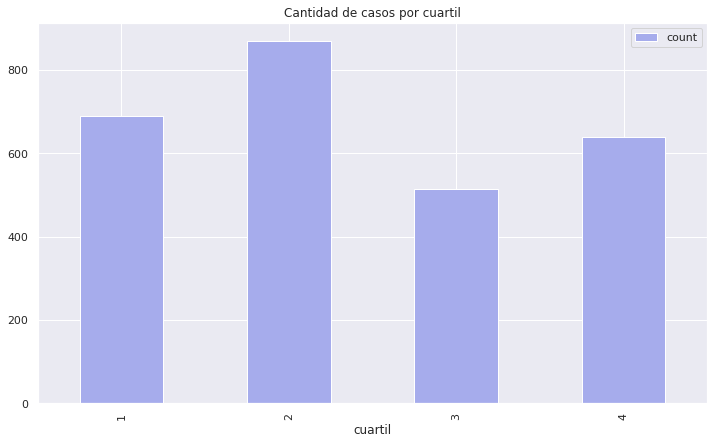

In [198]:
ganancias_bolsa.groupby("cuartil")["tiene_alto_valor_adquisitivo"].agg(["count"]).plot(kind="bar", title="Cantidad de casos por cuartil", color= '#a6acec');

La cantidad de casos esta bastante balanceada al igual que en perdidas.

Text(0, 0.5, 'porcentaje')

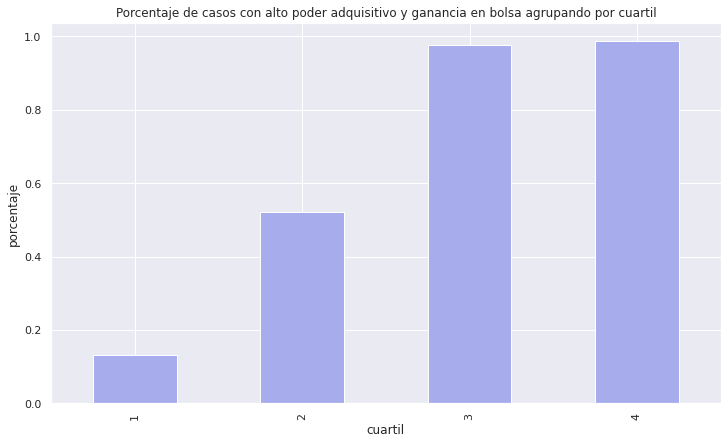

In [199]:
ax = ganancias_bolsa.groupby("cuartil")["tiene_alto_valor_adquisitivo"].mean().plot(kind="bar", title="Porcentaje de casos con alto poder adquisitivo y ganancia en bolsa agrupando por cuartil", color= '#a6acec')
ax.set_ylabel("porcentaje")


En el caso de ganancias, a partir del segundo cuartil esta claro que la gran mayoria de los casos tienen poder adquisitivo alto. En este caso sí podemos ver cómo, a mayor cuartil, mayor porcentaje de casos con alto poder adquisitivo hay. Lo mas llamativo es cómo los ultimos dos cuartiles tienen casi la totalidad de sus casos con alto poder adquisitivo.

No sabemos la razon, aunque una podría ser que las acciones que más subieron fueron las que tienen un precio más alto por acción, por lo cual pueden acceder a comprarlas solo las personas con alto poder adquisitivo, y por eso ellos fueron quienes más ganancias tuvieron, pero no podemos estar seguros con los datos que tenemos.

A pesar de que esta última hipótesis pueda ser correcta, tal vez no sería lo mejor utilizar este feature para predecir, ya que las acciones de la bolsa suelen ser muy volátiles y lo mas probable es que a futuro no siempre las acciones de más precio por unidad sean las que más suban en porcentaje.



### Trabajo

Hay trabajos con alguna tendencia al alto o bajo poder adquisitivo? Hay posiciones como las gerenciales y profesiones especializadas que suelen ser consideradas bien pagas, lo cual deberia coincidir con el alto poder adquisitivo. Al mismo tiempo, profesiones como servicio domestico y limpiador suelen ser conocidas por sus sueldos bajos.

Vamos a buscar si en este dataset se cumple.

Primero veamos cuantos casos hay por cada valor posible

Algunos trabajos tienen muy pocos casos, como servicio domestico y ejercito entonces la informacion que nos pueda aportar no podemos tenerla en cuenta

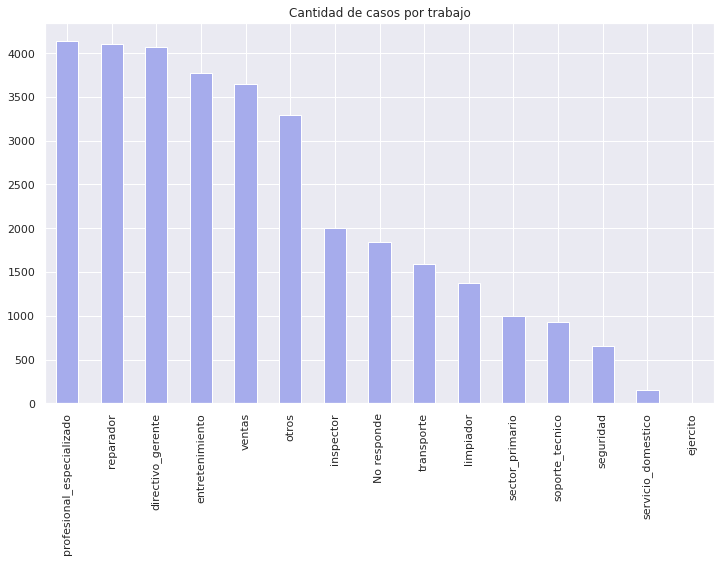

In [200]:
data["trabajo"].value_counts().plot(kind="bar", title="Cantidad de casos por trabajo", color= '#a6acec');

Ahora veamos el procentaje de casos que hay con alto poder adquisitivo por trabajo

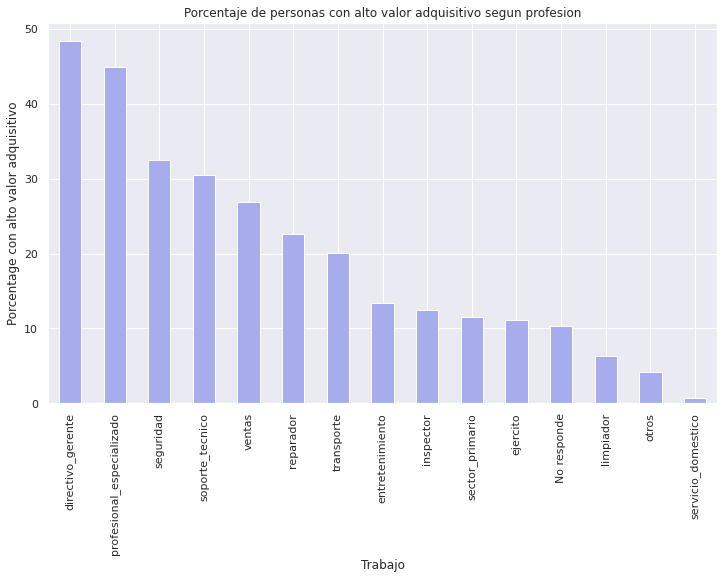

In [201]:
ax = (data.groupby("trabajo")["tiene_alto_valor_adquisitivo"].mean()*100)\
            .sort_values(ascending=False)\
            .plot(kind="bar", title = "Porcentaje de personas con alto valor adquisitivo segun profesion", color= '#a6acec')
ax.set_xlabel("Trabajo")
ax.set_ylabel("Porcentage con alto valor adquisitivo");

Podemos observar que los porcentajes segun la profesión varian mucho, yendo en algunos casos desde casi 50% hasta en otros casi 0%.

Como era de esperarse, los puestos de diretivo gerente y profesional especializado son los de mayor poder adquisitivo, y el puesto de limpiador tiene un bajo porcentaje alto poder adquisitivo.

Para el caso de servicio domestico, a pesar de tener un bajo porcentaje de casos con alto poder adquisitivo como pensamos en la hipotesis, no podemos confirmar nada ya que hay muy pocos casos en la muestra


### Edad

Hay alguna tendencia segun edad? Suponemos que lo mas esperable es que la gente joven que aun esta estudiando o comenzando a trabajar no tenga alto valor adquisitivo. 



In [202]:
data['edad'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: edad, dtype: float64

Vemos que los valores posibles de edad se encuentran entre 17 y 90.

Ahora podemos dividir el dataset en bins por rangos de edad. Para tener la misma cantidad de casos en cada bin, vamos a dividirlos en deciles para luego ver si hay alguna relacion entre edad y alto valor adquisitivo.

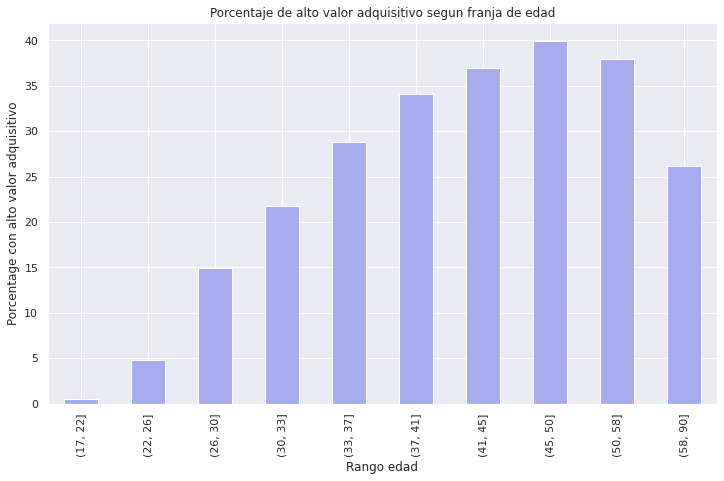

In [203]:
deciles = np.arange(1, 10) * 10
deciles_edad = [np.percentile(data["edad"], dec) for dec in deciles]
bins_edad = [17] + [int(i) for i in deciles_edad] + [90]
data["bin_edad"] = pd.cut(data['edad'],bins_edad)
ax = (data.groupby("bin_edad")['tiene_alto_valor_adquisitivo'].mean()*100).plot(kind="bar", title = "Porcentaje de alto valor adquisitivo segun franja de edad", color= '#a6acec')
ax.set_xlabel("Rango edad")
ax.set_ylabel("Porcentage con alto valor adquisitivo");

Vemos como los valores se alejan bastante de la media. Hay una tendencia creciente con la edad hasta llegar al rango de entre 45 a 50 años que es donde hay mayor proporcion de poder adquisitivo alto. Podemos confirmar que para los menores a 26 practicamente no hay gente con alto poder adquisitivo.

# Combinando Features

Al ver que habian algunos features con valores que parecen tener tendencias respecto al poder adquisitivo, decidimos probar combinar algunos para ver si esta tendencia era aun mas fuerte, ademas podría servir para ver si hay alguna alguna tendencia que exista para combinaciones entre features que individualmente no aporten mucha información.

## Trabajo y genero

Ya vimos anteriormente cómo la brecha de genero estaba muy marcada. Ahora vamos a buscar si agrupando por tipo de trabajo hay un comportamiento distinto al del promedio de los casos en general, como para mostrar una tendencia al alto o bajo poder adquisitivo.


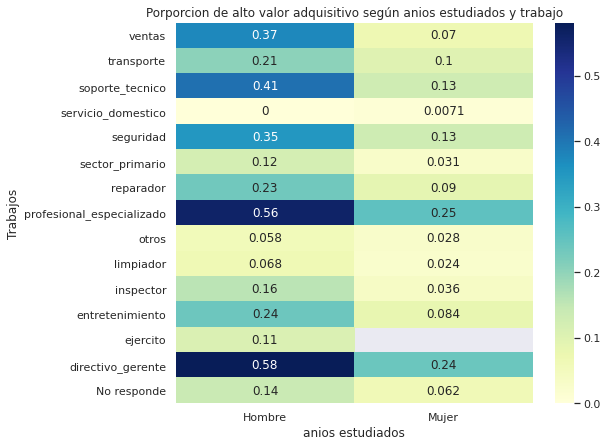

In [204]:
sns.set(rc={'figure.figsize':(8,7)})
trabajo_genero = pd.pivot_table(data = data, index = 'trabajo', values = 'tiene_alto_valor_adquisitivo', columns = 'genero')
trabajo_genero.sort_index(ascending =  False, inplace = True)
mascara = trabajo_genero.isnull()
g = sns.heatmap(trabajo_genero, mask = mascara, cmap="YlGnBu", annot=True)
g.set_ylabel("Trabajos")
g.set_xlabel("anios estudiados")
g.set_title("Porporcion de alto valor adquisitivo según anios estudiados y trabajo")

plt.show()

Podemos confirmar que en todas las profesiones hay mas hombres con alto poder adquisitivo que mujeres, casi siempre mas del doble. En algunos casos es mas marcada la diferencia, como podemos ver en reparador donde es 23% en hombres y 9% en mujeres. Tambien en ventas, con 37% hombres y 7% mujeres.


## Trabajo y años estudiados

Hay ciertos puesto que generalmente requieren, por ejemplo, titulo de  grado para poder aplicar, como los gerenciales o especializados. Vamos a ver si esto es cierto.

Primero clasificamos los anios estudiados: 1 y 9 estuvo en primaria, entre 10 y 14 anios es secundaria, a partir de los 15 años es universidad.

In [205]:
def agrupar_anios_estudiados(anios):
    if(anios <= 1):
        return 'jardin'
    elif(anios <=9):
        return 'primaria'
    elif(anios <= 14):
        return 'secundaria'
    return 'universitario'

In [206]:
data['anios_educacion_agrupado'] = data['anios_estudiados'].apply(agrupar_anios_estudiados)

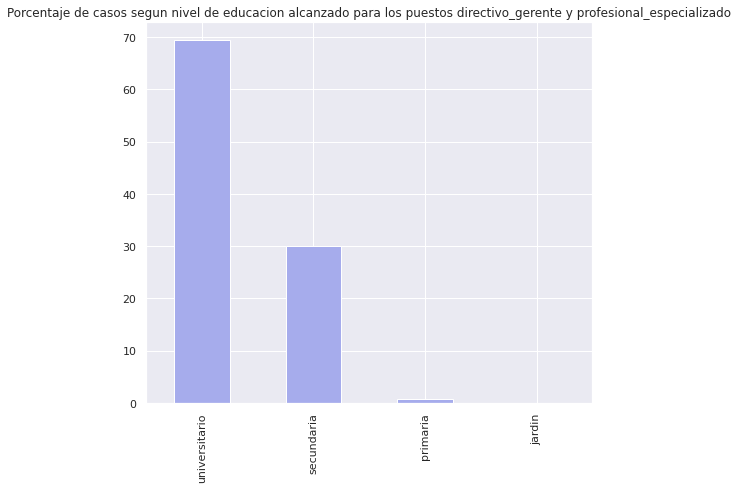

In [207]:
ax = (data[data["trabajo"].isin(["directivo_gerente", "profesional_especializado"])]["anios_educacion_agrupado"].value_counts(normalize=True)*100).plot(\
          kind="bar", title="Porcentaje de casos segun nivel de educacion alcanzado para los puestos directivo_gerente y profesional_especializado", color= '#a6acec')

Podemos confirmar que para los puestos gerenciales y especializados la gran mayoria de los casos son universitarios

Veamos, tomando todos los puestos, cuál es el porcentaje de casos con alto valor adquisitivo segun educación

In [208]:
orden_trabajo = ['No responde', 'otros', 'ejercito', 'servicio_domestico', 'limpiador', 'sector_primario', 'entretenimiento', 'transporte', 'seguridad', 'reparador', 'inspector', 'ventas', 'soporte_tecnico',
       'profesional_especializado', 'directivo_gerente']

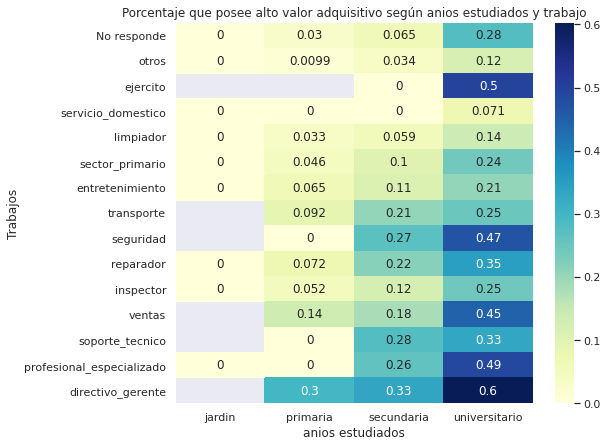

In [209]:
sns.set(rc={'figure.figsize':(8,7)})
trabajo_educacion = pd.pivot_table(data = data, index = 'trabajo', values = 'tiene_alto_valor_adquisitivo', columns = 'anios_educacion_agrupado')
trabajo_educacion.sort_index(ascending =  False, inplace = True)
trabajo_educacion = trabajo_educacion.reindex( ['jardin', 'primaria' ,'secundaria', 'universitario'],axis = 1)
trabajo_educacion = trabajo_educacion.reindex(orden_trabajo,axis = 0)
mascara = trabajo_educacion.isnull()
g = sns.heatmap(trabajo_educacion, mask = mascara, cmap="YlGnBu", annot=True)
g.set_ylabel("Trabajos")
g.set_xlabel("anios estudiados")
g.set_title("Porcentaje que posee alto valor adquisitivo según anios estudiados y trabajo")
plt.show()

Podemos observar que hay una tendencia a que aquellos que poseen educacion universitaria son quienes tienen mayor probabilidad de tener alto valor adquisitivo. Siendo mas propenso aquellos cuyo trabajo es ser directivo de gerente

Podemos observar claramente que aquellos que no tienen probabilidad de tener alto valor adquisitivo son quienes no tienen estudios primarios.

Tambien podemos ver que aquellos que no respondieron son quienes, sin importar su educacion alcanzada, poseen alta probabilidad de No tener alto valor adquisitivo

## Trabajo y categoria de trabajo

Sabiendo que además hay categorias obligatorias para trabajos o empresas que facturan valores altos (como responsable inscripto), vamos a ver si en este set de datos suelen tener alto poder adquisitivo combinandolas con ciertos tipos de trabajo.


In [210]:
orden_categoria = ['No responde', 'sin_trabajo', 'trabajo_voluntariado', 'monotibutista', 'relacion_de_dependencia', 'responsable_inscripto', 'empleado_provincial',
       'empleadao_estatal', 'empleado_municipal', ]

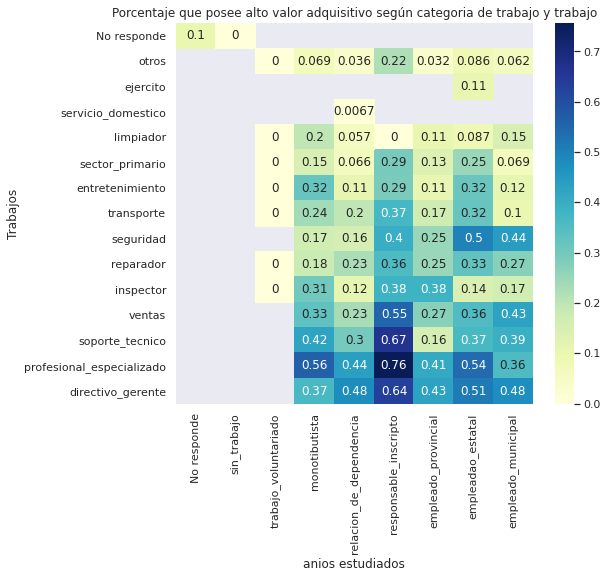

In [211]:
sns.set(rc={'figure.figsize':(8,7)})
trabajo_categoria = pd.pivot_table(data = data, index = 'trabajo', values = 'tiene_alto_valor_adquisitivo', columns = 'categoria_de_trabajo')
trabajo_categoria.sort_index(ascending =  False, inplace = True)
trabajo_categoria = trabajo_categoria.reindex(orden_categoria,axis = 1)
trabajo_categoria = trabajo_categoria.reindex(orden_trabajo,axis = 0)
mascara = trabajo_categoria.isnull()
g = sns.heatmap(trabajo_categoria, mask = mascara, cmap="YlGnBu", annot=True)
g.set_ylabel("Trabajos")
g.set_xlabel("anios estudiados")
g.set_title("Porcentaje que posee alto valor adquisitivo según categoria de trabajo y trabajo")

plt.show()

Podemos inferir que aquellos que poseen mayor probabilidad de tener alto valor adquisitivo son aquellos cuya categoria es "Responsable inscripto". Siendo mas precisos aquellos que cuyo trabajo es "profesional_especializado" son los que mayor probabilidad tienen

## Años estudiados y rol familiar

Habiendo ya visto que en la gente que mas años estudió es mas común que se tenga alto valor adquisitivo, y también lo es en roles familiares como casado, buscamos si combinando esto hay información valiosa

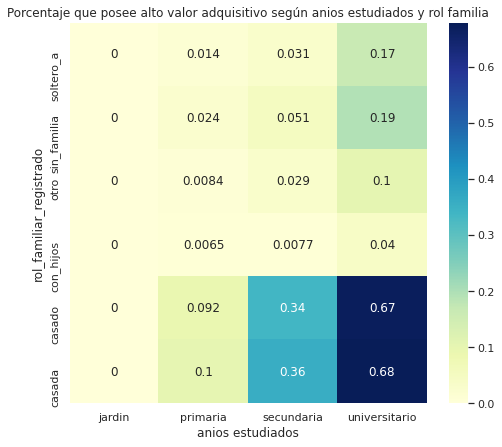

In [212]:
sns.set(rc={'figure.figsize':(8,7)})
familia_educacion = pd.pivot_table(data = data, index = 'rol_familiar_registrado', values = 'tiene_alto_valor_adquisitivo', columns = 'anios_educacion_agrupado')
familia_educacion.sort_index(ascending =  False, inplace = True)
familia_educacion = familia_educacion.reindex( ['jardin', 'primaria' ,'secundaria', 'universitario'],axis = 1)

mascara = familia_educacion.isnull()
g = sns.heatmap(familia_educacion, mask = mascara, cmap="YlGnBu", annot=True)
g.set_ylabel("rol_familiar_registrado")
g.set_xlabel("anios estudiados")
g.set_title("Porcentaje que posee alto valor adquisitivo según anios estudiados y rol familia")

plt.show()

Podemos confirmar que quienes poseen mayor probabilidad de tener alto valor adquisitivo son quienes son casados y ademas poseen un titulo universitario

## Selecionando features

Hemos visto en los graficos anteriores varios valores de features que parecen tener una tendencia respecto al poder adquisitivo. Veamos que pasa al filtrar valores para poder llegar a casos que sirvan para la función de baseline



Quedandonos solo con los casos donde el trabajo es directivo gerente, con educacion universitaria y genero masculino, podemos ver que el 70% de los casos tienen alto poder adquisitivo

In [213]:
data[(data["trabajo"] == "directivo_gerente") & (data["anios_educacion_agrupado"] == "universitario") & (data["genero_mujer"] == 0)]["tiene_alto_valor_adquisitivo"].mean()


0.6927144535840188

Tambien quedandonos con casos de hombres con trabajo de profesional especializado y responsable inscripto vemos que el 79% tienen alto poder adquisitivo

In [214]:
data[(data["trabajo"] == "profesional_especializado") & (data['categoria_de_trabajo'] == "responsable_inscripto") & (data["genero_mujer"] == 0)]["tiene_alto_valor_adquisitivo"].mean()

0.7916666666666666

# Conclusiones del análisis

Al buscar valores en features donde haya una tendencia distinta que tomando el general, nos encontramos con casos que cumplian con eso, pero representaban a una cantidad muy chica. Si lo que se busca es generalizar, tal vez no sea lo mas conveniente tomar esa tendencia como una realidad, ya que lo ideal seria tener mas datos para verificarlo.

Respecto al rol familiar pudimos confirmar la hipótesis de que la gente casada tiene mas poder adquisitivo.

Pudimos también confirmar la hipótesis de que la brecha de género esta presente, dado que el 85% de los casos de alto valor adquisitivo son hombres, al mismo tiempo que representan al 66% de los encuestados.

Respecto a los barrios, no pudimos comprobar si los barrios tradicionalmente conocidos por un costo de inmueble alto coinciden con el alto poder adquisitivo ya que casi todos los casos pertenecian al mismo barrio.

Para la gente que invierte en bolsa, vimos que dividiendo por cuartil , en los casos de personas con ganancias, a partir del segundo cuartil casi todas tienen alto poder adquisitivo. Para la gente con perdidas, esto varia segun el cuartil.

Luego en lo que es edad, confirmamos que las personas mas jovenes (principalmente menores a 26 años) suelen tener bajo poder adquisitivo.


# Baseline

Dado que el 75% de los casos son bajo poder adquisitivo, pondremos como valor de retorno de fault al 0. Las condiciones para devolver 1 las decidimos en base a casos que encontramos con gran mayoria de alto poder adquisitivo y las condiciones para devolver 0, con el caso contrario.



In [215]:
def predict(row):
  if row["anios_educacion_agrupado"] == "universitario":
    if row["trabajo"] == "directivo_gerente":
      if row["genero_mujer"] == 0: 
        return 1
    elif row["rol_familiar_registrado"] in ["casado", "casada"]:
      if row["edad"] <= 26:
        return 0
      else:
        return 1
    elif row["trabajo"] == "profesional_especializado":
      if row["categoria_de_trabajo"] == ["responsable_inscripto"]:
        return 1
  return 0




from typing import List
def baseline(X: pd.DataFrame) -> List[int]:
  return X.apply(predict, axis=1).tolist()

In [216]:
data["pred"] = baseline(data)
data["coincidence"] = data["pred"] == data["tiene_alto_valor_adquisitivo"]
data["coincidence"].mean().round(3)

0.814